In [166]:
## Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, AutoDateFormatter, AutoDateLocator, WeekdayLocator, MonthLocator, DayLocator, DateLocator, DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import datetime, calendar
from datetime import datetime
import matplotlib.patches as mpatches
%matplotlib inline

## Import data frome pickle generated from hotline_daily.py
data = pd.read_pickle('/home/keuch/gits/keuch/code_box/pyt/spreadsheetparsing/entwuerfe/agentenpickel.pkl')
data2=data.drop(['dt','dd','hh','tt','acw','wd','yy','ag','ht','vl','mm','an'],1)
wsplit=data2.groupby(['ww','lo','bz']).sum()

In [167]:
def ttmonatl(frame,agent):
    fig=plt.figure(figsize=(6,4))
    fig.suptitle('talk- und handlingtimes '+agent)
    aht="#003873"
    aacw="#EE0042"
    att="#899EB2"
    nzb="#C7798F"

    ax=fig.add_subplot(111)
    ax.margins(0,0)
    ax.set_xlabel('Monat')
    ax.set_ylabel('Minuten')
    ax.set_xticks(ustck.index)
    ax.set_ylim(0,10)
    ax.axhline(y=3.5,color=nzb,ls='--',alpha=0.6, label='3:30min')
    htime=ax.plot(frame.index,ustck['aht',agent],color=aht,label='aht')
    ttime=ax.plot(frame.index,ustck['att',agent],color=att,label='att')
    wtime=ax.plot(frame.index,ustck['aacw',agent],color=aacw,label='aacw')
    for mon in htime:
        xpos=mon.get_xdata()
        heig=mon.get_ydata()
        for coord in xpos:
            calls=frame['be',agent].values[coord-1]
            note=ax.text(coord,ax.get_ylim()[1], s=str(int(calls)),ha='center')

    ax.legend()

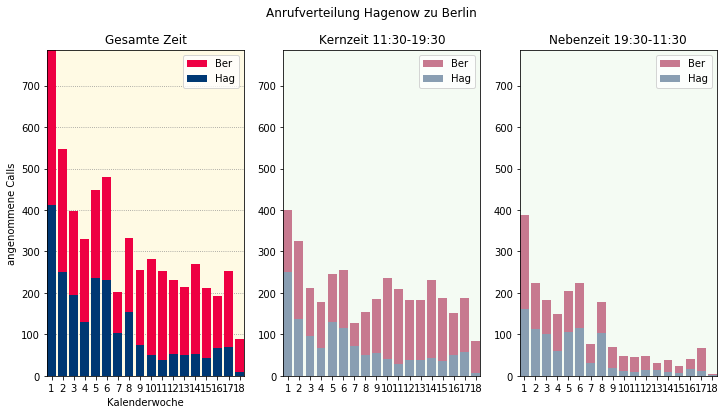

In [168]:
unstckd=wsplit.unstack().unstack()
kernzeit=unstckd['be','k']
nebenzeit=unstckd['be','n']

fig=plt.figure(figsize=(12,6))
fig.suptitle('Anrufverteilung Hagenow zu Berlin')
kzh="#003873"
kzb="#EE0042"
nzh="#899EB2"
nzb="#C7798F"

ax=fig.add_subplot(131)
ax.margins(0,0)
ax.set_facecolor('#FFFAE4')
ax.set_xticks(unstckd.index)
ax.set_title('Gesamte Zeit')
ax.set_ylabel('angenommene Calls')
ax.set_xlabel('Kalenderwoche')
ax.yaxis.grid(True, which='major', color='#8C8C8C', linestyle=':')
ax.set_axisbelow(True)
p2 = ax.bar(unstckd.index, nebenzeit['B']+kernzeit['B'], width=.8, color=kzb, bottom=nebenzeit['H']+kernzeit['H'], label="Ber")
p1 = ax.bar(unstckd.index, nebenzeit['H']+kernzeit['H'], width=.8, color=kzh, label="Hag")
maxcalls=ax.get_ylim()

ax2=fig.add_subplot(132)
ax2.margins(0,0)
ax2.set_facecolor('#F4FBF3')
ax2.set_xticks(unstckd.index)
ax2.set_title('Kernzeit 11:30-19:30')
ax2.set_ylim(maxcalls)
p2 = ax2.bar(unstckd.index, kernzeit['B'], width=.8, color=nzb, bottom=kernzeit['H'], label="Ber")
p1 = ax2.bar(unstckd.index, kernzeit['H'], width=.8, color=nzh, label="Hag")

ax3=fig.add_subplot(133)
ax3.margins(0,0)
ax3.set_facecolor('#F4FBF3')
ax3.set_xticks(unstckd.index)
ax3.set_title('Nebenzeit 19:30-11:30')
ax3.set_ylim(maxcalls)
p2 = ax3.bar(unstckd.index, nebenzeit['B'], width=.8, color=nzb, bottom=nebenzeit['H'], label="Ber")
p1 = ax3.bar(unstckd.index, nebenzeit['H'], width=.8, color=nzh, label="Hag")

ax.legend()
ax2.legend()
ax3.legend()

In [169]:
colfunx={'tt':'sum','acw':'sum','be':'sum','vl':'sum','an':'sum'}
monate=data.groupby(['mm','ag']).agg(colfunx)
monate['ht']=monate.tt+monate.acw
monate['att']=monate['tt']/monate.be
monate['aacw']=monate['acw']/monate.be
monate['aht']=monate['ht']/monate.be
ustck=monate.unstack()

alleagenten=monate.reset_index().groupby('mm')[['acw','tt','ht','be']].sum()
alleagenten['aht']=alleagenten['ht']/alleagenten['be']
alleagenten['att']=alleagenten['tt']/alleagenten['be']
alleagenten['aacw']=alleagenten['acw']/alleagenten['be']
alleagenten


ustck.loc[:,('be','alle')]=alleagenten['be']
ustck.loc[:,('aht','alle')]=alleagenten['aht']
ustck.loc[:,('att','alle')]=alleagenten['att']
ustck.loc[:,('aacw','alle')]=alleagenten['aacw']


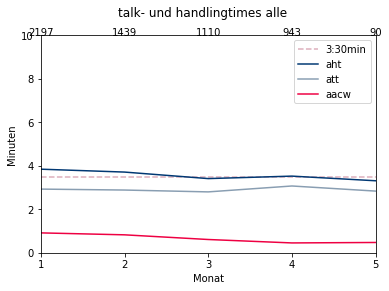

In [170]:
ttmonatl(ustck,'alle')

In [171]:
monate.loc[2].an.sum()

1439.0

In [172]:

data

dt    yy       tt bz  hh dd  \
2017-01-02 06:00:00 beckesi            2017-01-02  2017   0.4333  n   6  2   
2017-01-02 07:00:00 pfeifpe            2017-01-02  2017   0.3667  n   7  2   
2017-01-02 08:00:00 meyergu            2017-01-02  2017   5.0833  n   8  2   
2017-01-02 09:00:00 beckesi            2017-01-02  2017   3.9833  n   9  2   
                    haenthe            2017-01-02  2017   4.7333  n   9  2   
                    meyergu            2017-01-02  2017     7.55  n   9  2   
                    pletaan            2017-01-02  2017   4.0167  n   9  2   
                    stammdo            2017-01-02  2017   5.8667  n   9  2   
                    strausi            2017-01-02  2017     4.15  n   9  2   
2017-01-02 10:00:00 beckesi            2017-01-02  2017   5.2833  n  10  2   
                    haenthe            2017-01-02  2017   9.4333  n  10  2   
                    meyergu            2017-01-02  2017  15.1167  n  10  2   
                    pletaan            2017-01-02  2017   4.3667  n  10  2   
                    stammdo            2017-01-02  2017  10.6833  n  10  2   
2017-01-02 11:00:00 beckesi            2017-01-02  2017   9.8833  n  11  2   
                    haenthe            2017-01-02  2017    19.25  n  11  2   
                    meyergu            2017-01-02  2017     11.8  n  11  2   
                    pletaan            2017-01-02  2017   8.2833  n  11  2   
                    stammdo            2017-01-02  2017  14.2833  n  11  2   
                    strausi            2017-01-02  2017  11.6667  n  11  2   
2017-01-02 12:00:00 haenthe            2017-01-02  2017     5.05  k  12  2   
                    stammdo            2017-01-02  2017   1.7167  k  12  2   
2017-01-02 13:00:00 beckesi            2017-01-02  2017   6.6167  k  13  2   
                    haenthe            2017-01-02  2017      4.7  k  13  2   
                    pinnkat            2017-01-02  2017    11.05  k  13  2   
                    pletaan            2017-01-02  2017   0.9833  k  13  2   
                    strausi            2017-01-02  2017   1.6333  k  13  2   
2017-01-02 14:00:00 haenthe            2017-01-02  2017   2.2667  k  14  2   
                    pinnkat            2017-01-02  2017      8.9  k  14  2   
2017-01-02 15:00:00 meyergu            2017-01-02  2017     8.55  k  15  2   
...                                           ...   ...      ... ..  .. ..   
2017-05-02 14:00:00 plichba            2017-05-02  2017   4.7167  k  14  2   
                    stanzju Carexpert  2017-05-02  2017   6.6167  k  14  2   
2017-05-02 15:00:00 gesinst            2017-05-02  2017   4.3833  k  15  2   
                    neumath            2017-05-02  2017  12.2667  k  15  2   
                    papkeda Carexpert  2017-05-02  2017   1.9333  k  15  2   
                    pfeifpe            2017-05-02  2017      3.4  k  15  2   
2017-05-02 16:00:00 gesinst            2017-05-02  2017  16.4333  k  16  2   
                    henniju            2017-05-02  2017   1.8667  k  16  2   
                    neumath            2017-05-02  2017  16.5333  k  16  2   
                    papkeda Carexpert  2017-05-02  2017      3.3  k  16  2   
                    pfeifpe            2017-05-02  2017     7.25  k  16  2   
                    rabechr            2017-05-02  2017   5.0833  k  16  2   
                    stanzju Carexpert  2017-05-02  2017      6.8  k  16  2   
2017-05-02 17:00:00 gesinst            2017-05-02  2017   8.7167  k  17  2   
                    neumath            2017-05-02  2017   2.9833  k  17  2   
                    pfeifpe            2017-05-02  2017     5.15  k  17  2   
                    rabechr            2017-05-02  2017     3.15  k  17  2   
                    stanzju Carexpert  2017-05-02  2017  17.4333  k  17  2   
                    tetzlva            2017-05-02  2017     3.45  k  17  2   
2017-05-02 18:00:00 diessro            2017-05-02  2017  12.0833  k  

**SUMME KW14 = SUMME AGENTENAUSWERTUNG STIMMT MIT SUMME HOTLINE ÜBEREIN**
**SUMME KW8: AGENTEN 19 WENIGER ALS HOTLINE. AGENTEN FEHLEN?**